***Import functions and plot settings***

In [127]:
import pickle, os, matplotlib
import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap
# from matplotlib.ticker import ScalarFormatter
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
from collections import Counter
from matplotlib_venn import venn3, venn3_circles
import numpy as np
from matplotlib.patches import Rectangle

In [128]:
# settings
plt.interactive(False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def set_snsfont(s):
    sns.set(font_scale=s)
    sns.set_style("white")
set_snsfont(1.2)

# output directory
dir_in = '../manuscript/figures_data/'
dir_out = '../manuscript/figures/'

if not os.path.exists(dir_out):
    os.makedirs(dir_out)

In [3]:
### Generate the label dictionary
dir_cohort = '../anno_ref/cohorts'
feature_type = 'histology'
df_feat = pd.read_csv(os.path.join(dir_cohort,feature_type+'.csv'))
dict_feat_np = dict(Counter(df_feat[feature_type]))
dict_feat_np = {k: v for k, v in sorted(dict_feat_np.items(), key=lambda item: item[1])}

------------
### Figure0-1
***Figure0-pie plot***  
Change 'other' into more detailed label

In [5]:
### Load pie data
sizes = pickle.load(open(os.path.join(dir_in, 'pie_size.pkl'),'rb'))
labels = ['Missense','Silent','Other']

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
# plt.rcParams.update(plt.rcParamsDefault)
# plt.rcParams.update({'font.size': 22, 'axes.titlepad':50.0,'font.weight':'bold'})

plt.figure()
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',\
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig("%s/fig0pie_plot.pdf" % dir_out)
plt.close()

***Figure1-mutation heterogeneity***

In [6]:
#mutation heterogeneity data
df_muthete = pd.read_csv(os.path.join(dir_in, 'patient_syn_mut_hete.csv'))
group = df_muthete[['feature','syn_freq']].groupby(by = ['feature'])
sort_idx = group.median().sort_values(by = 'syn_freq').index
                                          
# Read mutation bias data
df_mutcateg = pd.read_csv(os.path.join(dir_in, 'mut_categs.csv'), index_col = 0)
df_mutcateg = df_mutcateg.dropna()
lfeat = df_mutcateg['feature'].unique().tolist()

In [9]:
### Plot mutation heterogeneity plot-----------
fig = plt.figure(figsize =(15,5))
spec = gridspec.GridSpec(ncols=39, nrows=2,
                         height_ratios=[5, 0.6])
fig.add_subplot(spec[0,:])
ax = sns.boxplot(x="feature", y="syn_freq", data=df_muthete, order = sort_idx, palette = "Spectral")
ax = sns.stripplot(x="feature", y="syn_freq", data=df_muthete,order = sort_idx, color = 'grey', jitter=0.05, alpha = 0.9)
ax.set_ylabel('log 10 Patient synonymous mutation frequency(/Mbp)');ax.set_xlabel('')
labels = [] # new label with patient number
for label in ax.get_xticklabels():
    feat = label.get_text()
    new_label = '(n='+str(dict_feat_np[feat])+') '+feat
    labels.append(new_label)
    label.set_ha("right")
#     label.set_rotation(90)
ax.set_xticklabels(labels) #reset new label number
ax.tick_params(axis='x', which='major',labelbottom = False, bottom=False, top = False, labeltop=True,rotation = 90)
sns.despine(left=True, bottom=True)

### plot mutation bias plot---------------------
color_sets = ['red','green','blue','black','magenta','yellow']
for i in range(0,len(lfeat)):
    df_his = df_mutcateg[df_mutcateg['feature'] == sort_idx[i]]
    n_patient = len(df_his)
    if i> 0:
        ax = fig.add_subplot(spec[1,i])
        df_his.plot.area(ax = plt.gca(),colormap='tab20')
        ax.get_legend().remove()
        #df_his.plot.bar(stacked = True,ax = axs,width = 1, color = color_sets, legend = False)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
    else:
        ax = fig.add_subplot(spec[1,i])
        df_his.plot.area(ax = plt.gca(),colormap='tab20')
        #df_his.plot.bar(stacked = True,ax = axs,width = 1, color = color_sets)
        ax.set_xticklabels('')
        ax.set_yticklabels('')
        ax.legend(loc='lower center', bbox_to_anchor=(15, -5),
                  ncol=6, fancybox=True, shadow=True)

plt.tight_layout()
# plt.show()
plt.savefig("%s/fig1mut_hete_plot.pdf" % dir_out)
plt.close()

/storage/home/yur97/anaconda3/envs/mSigsyn/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


***Figure1-local mutation rate*** -- This could only be run in a large memory kernel

In [4]:
### Plot local mutational heterogeneity plot
dict_loc8 = pickle.load(open(os.path.join(dir_in, 'locmut_chr8.pkl'),'rb'))

In [5]:
# Test script for changing xtick labels
matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize = (15,2))
ovary, = plt.plot(dict_loc8['Ovary']['pos'],dict_loc8['Ovary']['syn'], linewidth=1)
lung,= plt.plot(dict_loc8['Lung']['pos'],dict_loc8['Lung']['syn'], linewidth=1)
thy,= plt.plot(dict_loc8['Thy']['pos'],dict_loc8['Thy']['syn'], linewidth=1)
# Set spine invisivle
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.legend([ovary,lung,thy], ["Ovary-AdenoCA", "Lung-SCC","Thy-AdenoCA"])
plt.ylabel('Synonymous mutation number (/patient)')
plt.xlabel('Chromosome8 (Mbp)')
plt.xticks(np.arange(0,146274826,10000000))
plt.gca().set_xticklabels([int((x/1000000)) for x in np.arange(0,146274826,10000000)])
# plt.show()
plt.savefig("%s/fig1locmut_chr8.pdf" % dir_out)
plt.close()

In [6]:
dict_loc18 = pickle.load(open(os.path.join(dir_in, 'locmut_chr18.pkl'),'rb'))

In [9]:
matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize = (15,2))
ovary, = plt.plot(dict_loc18['Ovary']['pos'],dict_loc18['Ovary']['syn'], linewidth=1)
lung,= plt.plot(dict_loc18['Lung']['pos'],dict_loc18['Lung']['syn'], linewidth=1)
thy,= plt.plot(dict_loc18['Thy']['pos'],dict_loc18['Thy']['syn'], linewidth=1)
# Set spine invisivle
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.legend([ovary,lung,thy], ["Ovary-AdenoCA", "Lung-SCC","Thy-AdenoCA"],loc='upper left', bbox_to_anchor=(0, 5))
plt.ylabel('Synonymous mutation number (/patient)')
plt.xlabel('Chromosome18 (Mbp)')
plt.xticks(np.arange(0,76117153,10000000))
plt.gca().set_xticklabels([int((x/1000000)) for x in np.arange(0,76117153,10000000)])
# plt.show()
plt.savefig("%s/fig1locmut_chr18.pdf" % dir_out)
plt.close()

-----
### Figure3

***Figure3-non-synonymous heatmap***

In [93]:
dict_venn = pickle.load(open(os.path.join(dir_in, 'dict_venn.pkl'),'rb'))
df_nsyn = pickle.load(open(os.path.join(dir_in, 'df_nsyn_pivot.pkl'), 'rb'))

***Below a test script for new figure 3***

In [121]:
# Select cohort to plot
sel = ['Breast-AdenoCA','Lymph-BNHL','Head-SCC','ColoRect-AdenoCA','Lung-AdenoCA', 'Kidney-RCC','Biliary-AdenoCA']
df_nsyn_sel = df_nsyn.loc[:,sel]
df_nsyn_sel = df_nsyn_sel[df_nsyn_sel>5]
df_nsyn_sel = df_nsyn_sel.dropna(axis=0, how='all')
df_nsyn_sel = df_nsyn_sel.transpose()

In [130]:
shape = df_nsyn_sel.shape
# fig, ax = plt.subplots(figsize = (shape[1]/3+3, shape[0]/3+2))
fig, ax = plt.subplots(figsize = (15,4))

cmap = plt.get_cmap("YlGnBu",30);cmap.set_under('white')
ax = sns.heatmap(df_nsyn_sel,cmap=cmap,yticklabels=True,xticklabels=True,\
                 square= False,linewidth = 0.5,linecolor="grey", cbar_kws={"shrink": 0.3})
ax.set_ylabel('Histology Cohorts'); ax.set_xlabel('Significant Genes')
# add patient number to ticks
labels=[]
for label in ax.get_yticklabels():
    feat = label.get_text()
    new_label =feat +  ' (n='+str(dict_feat_np[feat])+') '
    labels.append(new_label)
    label.set_ha("right")
    
# plt.rcParams['xtick.bottom']  = True
# plt.rcParams['xtick.top'] = False
ax.set_yticklabels(labels)
plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(dir_out,f'fig3_heatmap_sel.pdf'))
plt.close()

In [115]:
plt.figure(figsize = (6,4))
v = venn3(subsets = dict_venn['size'] , \
          set_labels = ('Cancer Gene Census', 'MutSigCVsyn-\nnonsynonymous', 'PCAWG driver list'),\
         alpha = 0.2)
# v.get_patch_by_id(idx).set_alpha(1.0)
# v.get_patch_by_id(idx).set_color('white')
# v.get_label_by_id('111').set_text('PCAWG & CGC')
# Set label position
for text in v.set_labels:
    if text.get_text() == 'PCAWG driver list':
        x = text.get_position()[0]+0.15
        y = text.get_position()[1]-0.2
        text.set_position((x,y))

c = venn3_circles(subsets=dict_venn['size'], linestyle='dashed', linewidth = 1)
# c[1].set_lw(1.5)
# c[1].set_ls('dotted')
# plt.annotate(annotation, xy=v.get_label_by_id(idx).get_position() - np.array([0, 0.02]), xytext=(100,-70),
#              ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.2),
#              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2',color='grey'))

plt.tight_layout()
# plt.show()
plt.savefig(os.path.join(dir_out,f'fig3_venn.pdf'))
plt.close()

***End of test script for new figure 3***

In [131]:
def draw_venn(idx, annotation):
    plt.figure(figsize = (8,5))
    v = venn3(subsets = dict_venn['size'] , \
              set_labels = ('Cancer Gene Census', 'MutSigCVsyn-\nnonsynonymous', 'PCAWG driver list'),\
             alpha = 0.2)
    v.get_patch_by_id(idx).set_alpha(1.0)
    v.get_patch_by_id(idx).set_color('white')
    # v.get_label_by_id('111').set_text('PCAWG & CGC')
    # Set label position
    for text in v.set_labels:
        if text.get_text() == 'PCAWG driver list':
            x = text.get_position()[0]+0.15
            y = text.get_position()[1]-0.2
            text.set_position((x,y))

    c = venn3_circles(subsets=dict_venn['size'], linestyle='dashed', linewidth = 1)
    c[1].set_lw(1.5)
    c[1].set_ls('dotted')
    plt.annotate(annotation, xy=v.get_label_by_id(idx).get_position() - np.array([0, 0.02]), xytext=(100,-70),
                 ha='center', textcoords='offset points', bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.2),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2',color='grey'))
    
    plt.tight_layout()
    # plt.show()
    plt.savefig(os.path.join(dir_out,f'fig3_venn_{annotation}.pdf'))
    plt.close()

In [132]:
# draw_venn('111','PCAWG_CGC')
# draw_venn('010','Novel')
# draw_venn('110','CGC_only')
draw_venn('011','PCAWG_only')

In [136]:
def draw_heatmap(df,annotation):
    shape = df.shape
    fig, ax = plt.subplots(figsize = (shape[1]/3+3, shape[0]/3+2))
    cmap = plt.get_cmap("YlGnBu",30);cmap.set_under('white')
    ax = sns.heatmap(df,cmap=cmap,yticklabels=True,xticklabels=True,\
                     square=True,linewidth = 0.5,linecolor="grey", cbar_kws={"shrink": 0.3})
    ax.set_xlabel('Significant Genes'); ax.set_ylabel('Histology Cohort')
    # add patient number to ticks
    labels=[]
    for label in ax.get_yticklabels():
        feat = label.get_text()
        new_label =feat +  ' (n='+str(dict_feat_np[feat])+') '
        labels.append(new_label)
        label.set_ha("right")
    ax.set_yticklabels(labels)
    
    ### IF this is the PCAWG only set, hightlight the PCAWG exclusive genes identified
    if annotation == 'PCAWG_only':
        r1 = Rectangle((3, 3), 1, 1, fill=False, edgecolor='blue', lw=1.5)
        ax.add_patch(r1)
        r2 = Rectangle((4, 3), 1, 1, fill=False, edgecolor='blue', lw=1.5)
        ax.add_patch(r2)
        r3 = Rectangle((11, 3), 1, 1, fill=False, edgecolor='blue', lw=1.5)
        ax.add_patch(r3)
        r4 = Rectangle((14, 3), 1, 1, fill=False, edgecolor='blue', lw=1.5)
        ax.add_patch(r4)
        r5 = Rectangle((16, 6), 1, 1, fill=False, edgecolor='blue', lw=1.5)
        ax.add_patch(r5)
        r6 = Rectangle((17, 3), 1, 1, fill=False, edgecolor='blue', lw=1.5)
        ax.add_patch(r6)

    plt.tight_layout()
    # plt.show()
    plt.savefig(os.path.join(dir_out,f'fig3_heatmap_{annotation}.pdf'))
    plt.close()

In [137]:
# draw_heatmap(dict_venn['novel'].transpose().dropna(axis=0, how='all'),'Novel')
# draw_heatmap(dict_venn['cgc_pcawg'].transpose().dropna(axis=0, how='all'),'PCAWG_CGC')
# draw_heatmap(dict_venn['cgc_only'].transpose().dropna(axis=0, how='all'),'CGC_only')
draw_heatmap(dict_venn['pcawg_only'].transpose().dropna(axis=0, how='all'),'PCAWG_only')

---------------
### Figure4- Synonymous heatmap

In [138]:
df_pivot_syn = pd.read_csv(os.path.join(dir_in,'syn_forheatmap.csv'),index_col = 0)

In [144]:
def draw_heatmap_syn(df):
    shape = df.shape
    fig, ax = plt.subplots(figsize = (shape[1]/3+3, shape[0]/3+2))
    cmap = plt.get_cmap("YlGnBu",30);cmap.set_under('white')
    ax = sns.heatmap(df,cmap=cmap,yticklabels=True,xticklabels=True,\
                     square=True,linewidth = 0.5,linecolor="grey", cbar_kws={"shrink": 0.3})
    ax.set_ylabel('Significant Genes'); ax.set_xlabel('Histology Cohort')
    # add patient number to ticks
    labels=[]
    for label in ax.get_xticklabels():
        feat = label.get_text()
        new_label =feat +  ' (n='+str(dict_feat_np[feat])+') '
        labels.append(new_label)
        label.set_ha("right")
    ax.set_xticklabels(labels)

    plt.tight_layout()
    plt.savefig(os.path.join(dir_out,f'fig4_heatmap.pdf'))
    plt.close()

In [145]:
draw_heatmap_syn(df_pivot_syn)

---------------
### Suppfig1 - Individual genes(expression/ceres test)

PURA expression

In [6]:
dict_pura = pickle.load(open(os.path.join(dir_in, 'dict_pura.pkl'),'rb'))

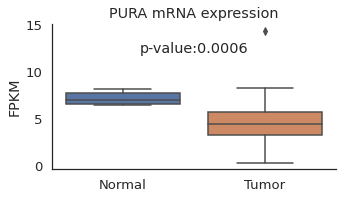

In [19]:
#mannwhitney test result
text = f'p-value:{round(dict_pura["pval"],4)}'

plt.figure(figsize = (5,3))
ax = sns.boxplot(x = 'tumor.normal', y = 'exp', data = dict_pura['df_exp'])
ax.annotate(text, (0.5,12),horizontalalignment="center",)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('PURA mRNA expression'); ax.set_xlabel(''); ax.set_xticklabels(['Normal(n = 6)','Tumor(n = 85)']); ax.set_ylabel('FPKM')
# plt.savefig('./res/'+organ_type+'_'+gene_name+'.png')
plt.tight_layout()
plt.show()
plt.close()

NACA CERES score -- in melanoma lineage or not

In [9]:
dict_naca = pickle.load(open(os.path.join(dir_in, 'dict_naca.pkl'),'rb'))

In [ ]:
text = f'p-value:{round(dict_naca["pval"],4)}'

plt.figure()
ax = sns.boxplot(x = 'variable', y = 'value', data = dict_naca['df_ceres'])
ax.annotate(text, (0.5,12),horizontalalignment="center",)
ax.set_xticklabels(['in Lineage(n = 56)','n = 921'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print(text)
plt.show()

CALR CERES score

In [ ]:
dict_calr = pickle.load(open(os.path.join(dir_in, 'dict_calr.pkl'),'rb'))

In [ ]:
text = f'p-value:{round(dict_calr["pval"],4)}'

plt.figure()
ax = sns.boxplot(x = 'variable', y = 'value', data = dict_calr['df_ceres'])
ax.annotate(text, (0.5,12),horizontalalignment="center",)
ax.set_xticklabels(['in Lineage(n = 20)','n = 969'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print(text)
plt.show()